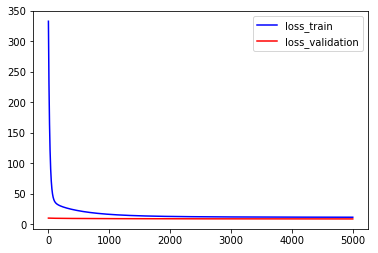

In [1]:
import numpy as np
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#数据读取和分割
data = load_svmlight_file("housing.txt")
x = data[0]
y = data[1]
x = x.toarray()
y = y.T
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=1)

#学习率、C、权重的设置
rating = 0.01
weight = np.ones(14)

#训练集和测试集的长度
train_length = int(x_train.size/13)
test_length = int(x_test.size/13)

#测试集和训练集的截距设置
weight0  = np.ones(train_length)
weight1  = np.ones(test_length)
x_train = np.column_stack([x_train,weight0])
x_test = np.column_stack([x_test,weight1])

#训练集和测试集的loss数组
loss_train = np.array([])
loss_test = np.array([])

#定义线性回归模型
def linear_regression(x,y,length,weight,rating,number,loss):
    for i in range(number):
        gradient = (np.dot(np.dot(x.T, x),weight) - np.dot(x.T , y))/(length*2)
        weight =  weight - rating * gradient
        y_predict = np.dot(weight.T,x.T)
        loss = np.append(loss,np.dot(y_predict - y,y_predict - y)/(2*length))
    return loss,weight

#训练和测试
loss_train,weight = linear_regression(x_train,y_train,train_length,weight,rating,5000,loss_train)
loss_test,weight = linear_regression(x_test,y_test,test_length,weight,rating,5000,loss_test)

#图显示
plt.figure()
#蓝色的为训练集，红色的为测试集
plt.plot(loss_train,'blue',label='loss_train')
plt.plot(loss_test,'red',label='loss_validation')
plt.legend()
plt.show()
